<a href="https://colab.research.google.com/github/Saumya-N/Business-Cases_EDA-and-Supervised-ML/blob/main/OLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement and EDA

## Problem Statement:

For Ola, a leading ride-sharing platform committed to delivering reliable, affordable, and convenient urban transportation, the challenge lies in optimizing driver retention to sustain operational efficiency and customer satisfaction. Despite its efforts, the company grapples with a persistent churn rate among its drivers, necessitating a proactive approach to ensure driver loyalty and minimize attrition.

To address this challenge, Ola seeks to leverage its wealth of driver data to uncover underlying patterns in driver behavior, performance, and satisfaction. By harnessing the power of data science and ensemble learning techniques, Ola aims to develop predictive models capable of anticipating potential driver churn. These models will serve as a cornerstone of Ola's driver retention strategy, enabling the company to implement timely interventions and tailored incentives to mitigate churn risk effectively.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("/content/ola_driver_scaler.csv")

In [3]:
df.head(20)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [5]:
# Conversion of Date related columns from 'Object' type to 'datatime' data type
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [6]:
# Drop irrelevant column(s)
df.drop('Unnamed: 0', axis=1, inplace=True)

## Feature Engineering:

In [7]:
# Create a column to depict the count of Drivers that have Negative or Zero Business Value at some point.
df['Negative TBV'] = (df['Total Business Value'] < 0).astype(int)
df['Zero_TBV']=(df['Total Business Value'] == 0).astype(int)

In [8]:
# Extract quarter from 'Reporting Date'
df['Quarter'] = df['MMM-YY'].dt.to_period('Q')

# Group by 'Quarter' and calculate the sum of 'Total Business Value'
quarterly_total_business_value = df.groupby(['Driver_ID', 'Quarter'])['Total Business Value'].sum()

# Reset index to make 'Quarter' a column instead of index
quarterly_total_business_value = quarterly_total_business_value.reset_index()

# Display the aggregated quarterly total business value
print(quarterly_total_business_value)

      Driver_ID Quarter  Total Business Value
0             1  2019Q1               1715580
1             2  2020Q4                     0
2             4  2019Q4                     0
3             4  2020Q1                350000
4             4  2020Q2                     0
...         ...     ...                   ...
7352       2787  2019Q1                977830
7353       2787  2019Q2                     0
7354       2788  2020Q2                     0
7355       2788  2020Q3               1686340
7356       2788  2020Q4                611900

[7357 rows x 3 columns]


In [9]:
# Create a dataframe grouped by Driver ID
unique_drivers = df['Driver_ID'].unique()
df_grouped = df.groupby('Driver_ID').agg({
    'MMM-YY': 'first',
    'Age': 'max',
    'Gender': 'first',
    'City': 'first',
    'Education_Level': 'max',
    'Income': np.mean,
    'Dateofjoining': 'first',
    'LastWorkingDate': lambda x: x.dropna().iloc[0] if not x.dropna().empty else None,
    'Joining Designation': 'max',
    'Grade': 'max',
    'Total Business Value': 'sum',
    'Quarterly Rating': np.mean,
    'Negative TBV': 'sum',
    'Zero_TBV': 'sum'

})
df_grouped.head()

,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Negative TBV,Zero_TBV
Driver_ID,,,,,,,,,,,,,,
1,2019-01-01,28.0,0.0,C23,2,57387.0,2018-12-24,2019-03-11,1,1,1715580,2.0,1,1
2,2020-11-01,31.0,0.0,C7,2,67016.0,2020-11-06,NaT,2,2,0,1.0,0,2
4,2019-12-01,43.0,0.0,C13,2,65603.0,2019-12-07,2020-04-27,2,2,350000,1.0,0,4
5,2019-01-01,29.0,0.0,C9,0,46368.0,2019-01-09,2019-03-07,1,1,120360,1.0,0,2
6,2020-08-01,31.0,1.0,C11,1,78728.0,2020-07-31,NaT,3,3,1265000,1.6,0,4


In [10]:
# Check the presence and distribution of different Negative TBVs
df_grouped['Negative TBV'].value_counts()

0    2245
1     125
2       9
3       2
Name: Negative TBV, dtype: int64

In [11]:
# Check the presence and distribution of different Zero TBVs
df_grouped['Zero_TBV'].value_counts()

2     533
1     520
3     474
4     350
5     210
0     148
6      70
7      39
8      15
9       8
10      6
11      5
12      1
15      1
14      1
Name: Zero_TBV, dtype: int64

In [12]:
# Check null values
df_grouped.isna().sum()

MMM-YY                    0
Age                       0
Gender                    0
City                      0
Education_Level           0
Income                    0
Dateofjoining             0
LastWorkingDate         765
Joining Designation       0
Grade                     0
Total Business Value      0
Quarterly Rating          0
Negative TBV              0
Zero_TBV                  0
dtype: int64

In [13]:
# Check the shape of the grouped dataframe
df_grouped.shape

(2381, 14)

In [14]:
# Check the duplicates for the grouped dataframe
df_grouped.duplicated().sum()

0

In [15]:
# Calculate the count of drivers with increased Quarterly Rating
def qrt_rat_inc(rating):
    if len(rating) >= 2:
        return int(rating.iloc[-1] > rating.iloc[-2])
    else:
        return 0

Quarterly_Rating_increased = df.groupby("Driver_ID")["Quarterly Rating"].apply(qrt_rat_inc).reset_index(name='Quarterly_Rating_increased')

df_grouped = pd.merge(left=df_grouped,
                right=Quarterly_Rating_increased,
                on="Driver_ID",
                how="outer")

df_grouped['Quarterly_Rating_increased'].value_counts()

0    2365
1      16
Name: Quarterly_Rating_increased, dtype: int64

In [16]:
# Calculate the count of drivers with decreased Quarterly Rating
def qrt_rat_dec(rating):
    if len(rating) >= 2:
        return int(rating.iloc[-1] < rating.iloc[-2])
    else:
        return 0

Quarterly_Rating_decreased = df.groupby("Driver_ID")["Quarterly Rating"].apply(qrt_rat_dec).reset_index(name='Quarterly_Rating_decreased')

df_grouped = pd.merge(left=df_grouped,
                right=Quarterly_Rating_decreased,
                on="Driver_ID",
                how="outer")

df_grouped['Quarterly_Rating_decreased'].value_counts()

0    2251
1     130
Name: Quarterly_Rating_decreased, dtype: int64

In [17]:
# Calculate the count of drivers with increased Income
def inc_income(inc):
    if len(inc) >= 2:
        return int(inc.iloc[-1] > inc.iloc[-2])
    else:
        return 0

Increased_income = df.groupby("Driver_ID")["Income"].apply(inc_income).reset_index(name='Increased_income')

df_grouped = pd.merge(left=df_grouped,
                right=Increased_income,
                on="Driver_ID",
                how="outer")

df_grouped['Increased_income'].value_counts()

0    2370
1      11
Name: Increased_income, dtype: int64

In [18]:
# Calculate the count of drivers with increase in Grade
def inc_grade(grd):
  if len(grd)>=2:
    return int(grd.iloc[-1]>grd.iloc[-2])
  else:
    return 0

Increased_grade = df.groupby("Driver_ID")["Grade"].apply(inc_grade).reset_index(name='Increased_grade')

df_grouped = pd.merge(left=df_grouped,
                right=Increased_grade,
                on="Driver_ID",
                how="outer")

df_grouped['Increased_grade'].value_counts()

0    2370
1      11
Name: Increased_grade, dtype: int64

In [19]:
# Calculate the count of drivers with decrease in Grade
def dec_grade(grd):
  if len(grd)>=2:
    return int(grd.iloc[-1]<grd.iloc[-2])
  else:
    return 0

Decreased_grade = df.groupby("Driver_ID")["Grade"].apply(dec_grade).reset_index(name='Decreased_grade')

df_grouped = pd.merge(left=df_grouped,
                right=Decreased_grade,
                on="Driver_ID",
                how="outer")

df_grouped['Decreased_grade'].value_counts()

0    2380
1       1
Name: Decreased_grade, dtype: int64

In [20]:
# Calculate the count of drivers with decreased Income
def dec_income(inc):
    if len(inc) >= 2:
        return int(inc.iloc[-1] < inc.iloc[-2])
    else:
        return 0

Decreased_income = df.groupby("Driver_ID")["Income"].apply(dec_income).reset_index(name='Decreased_income')

df_grouped = pd.merge(left=df_grouped,
                right=Decreased_income,
                on="Driver_ID",
                how="outer")

df_grouped['Decreased_income'].value_counts()

0    2380
1       1
Name: Decreased_income, dtype: int64

In [21]:
# Drop irrelevant columns
df_grouped=df_grouped.drop(['Decreased_income', 'Decreased_grade'], axis=1)

In [22]:
# Extract year from Date of Joining
df_grouped['JoiningYear']=df_grouped['Dateofjoining'].dt.year

In [23]:
# Calculate Total Business Value to Income ratio
df_grouped['TBV2Inc']=df_grouped['Total Business Value']//df_grouped['Income']

In [24]:
# Create the target variable to classify the Drivers' attrition
df_grouped['target'] = df_grouped['LastWorkingDate'].notnull().astype(int)

In [25]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Driver_ID                   2381 non-null   int64         
 1   MMM-YY                      2381 non-null   datetime64[ns]
 2   Age                         2381 non-null   float64       
 3   Gender                      2381 non-null   float64       
 4   City                        2381 non-null   object        
 5   Education_Level             2381 non-null   int64         
 6   Income                      2381 non-null   float64       
 7   Dateofjoining               2381 non-null   datetime64[ns]
 8   LastWorkingDate             1616 non-null   datetime64[ns]
 9   Joining Designation         2381 non-null   int64         
 10  Grade                       2381 non-null   int64         
 11  Total Business Value        2381 non-null   int64       

In [26]:
df_grouped.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,...,Quarterly Rating,Negative TBV,Zero_TBV,Quarterly_Rating_increased,Quarterly_Rating_decreased,Increased_income,Increased_grade,JoiningYear,TBV2Inc,target
0,1,2019-01-01,28.0,0.0,C23,2,57387.0,2018-12-24,2019-03-11,1,...,2.0,1,1,0,0,0,0,2018,29.0,1
1,2,2020-11-01,31.0,0.0,C7,2,67016.0,2020-11-06,NaT,2,...,1.0,0,2,0,0,0,0,2020,0.0,0
2,4,2019-12-01,43.0,0.0,C13,2,65603.0,2019-12-07,2020-04-27,2,...,1.0,0,4,0,0,0,0,2019,5.0,1
3,5,2019-01-01,29.0,0.0,C9,0,46368.0,2019-01-09,2019-03-07,1,...,1.0,0,2,0,0,0,0,2019,2.0,1
4,6,2020-08-01,31.0,1.0,C11,1,78728.0,2020-07-31,NaT,3,...,1.6,0,4,0,0,0,0,2020,16.0,0


In [27]:
df_grouped['target'].value_counts()

1    1616
0     765
Name: target, dtype: int64

# Data Visualization

## Statistical Analysis

In [28]:
df_grouped.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Negative TBV,Zero_TBV,Quarterly_Rating_increased,Quarterly_Rating_decreased,Increased_income,Increased_grade,JoiningYear,TBV2Inc,target
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.663167,0.410332,1.00756,59232.460484,1.820244,2.097018,4.586742e+06,1.566304,0.062579,2.729525,0.006720,0.054599,0.004620,0.004620,2018.536329,71.417472,0.678706
std,806.161628,5.983375,0.491997,0.81629,28298.214012,0.841433,0.941702,9.127115e+06,0.719652,0.267006,1.814717,0.081716,0.227243,0.067827,0.067827,1.609597,125.767775,0.467071
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,-27.000000,0.000000
25%,695.000000,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,0.000000,0.000000
50%,1400.000000,33.000000,0.000000,1.00000,55285.000000,2.000000,2.000000,8.176800e+05,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,15.000000,1.000000
75%,2100.000000,37.000000,1.000000,2.00000,75835.000000,2.000000,3.000000,4.173650e+06,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,79.000000,1.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,3.000000,15.000000,1.000000,1.000000,1.000000,1.000000,2020.000000,1058.000000,1.000000


In [29]:
# % of Drivers leaving based on 'Education Level'
print('% of attrition based on Education Level')
print(round((df_grouped.groupby('Education_Level')['target'].mean())*100,2))

# % of Drivers leaving based on 'Grade'
print('% of attrition based on Grade')
print(round((df_grouped.groupby('Grade')['target'].mean())*100,2))

# Count of Drivers based on 'Grade'
print('Driver count by Grade')
print(df_grouped['Grade'].value_counts())

# Count of Drivers leaving based on 'Total Business Value'
print('Count of Drivers leaving based on Total Business Value')
print(round((df_grouped.groupby('target')['Total Business Value'].mean()),2))

% of attrition based on Education Level
Education_Level
0    69.13
1    66.29
2    68.20
Name: target, dtype: float64
% of attrition based on Grade
Grade
1    80.43
2    70.26
3    54.01
4    50.72
5    54.17
Name: target, dtype: float64
Driver count by Grade
2    854
1    741
3    624
4    138
5     24
Name: Grade, dtype: int64
Count of Drivers leaving based on Total Business Value
target
0    9620626.31
1    2203745.76
Name: Total Business Value, dtype: float64


### TBV Analysis Based on decreased Quarterly Rating

In [30]:
df_grouped[df_grouped['Quarterly_Rating_decreased']==1]

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,...,Quarterly Rating,Negative TBV,Zero_TBV,Quarterly_Rating_increased,Quarterly_Rating_decreased,Increased_income,Increased_grade,JoiningYear,TBV2Inc,target
15,22,2019-01-01,41.0,0.0,C10,2,31224.0,2018-05-25,2020-04-26,1,...,2.875000,0,1,0,1,0,0,2018,241.0,1
16,24,2019-01-01,31.0,0.0,C24,2,76308.0,2018-05-25,2019-10-27,1,...,2.300000,0,0,0,1,0,0,2018,53.0,1
43,57,2019-01-01,38.0,1.0,C1,1,84318.0,2017-07-26,2020-07-21,1,...,3.052632,1,1,0,1,0,0,2017,270.0,1
94,113,2019-06-01,42.0,1.0,C10,0,47160.0,2019-06-23,2019-10-17,1,...,1.600000,1,3,0,1,0,0,2019,14.0,1
146,172,2019-01-01,41.0,1.0,C6,2,101395.0,2017-11-07,2019-06-29,2,...,2.714286,0,2,0,1,0,0,2017,52.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,2738,2019-01-01,24.0,0.0,C17,0,23068.0,2018-09-08,2020-01-05,1,...,2.846154,0,1,0,1,0,0,2018,257.0,1
2356,2759,2019-01-01,29.0,0.0,C17,1,82260.0,2018-08-24,2019-10-28,2,...,2.500000,0,1,0,1,0,0,2018,61.0,1
2359,2762,2019-01-01,40.0,0.0,C1,1,52682.0,2018-05-05,2019-04-15,2,...,2.500000,0,1,0,1,0,0,2018,77.0,1
2368,2773,2019-06-01,36.0,0.0,C19,0,35607.0,2019-06-21,2020-01-04,1,...,1.375000,0,6,0,1,0,0,2019,15.0,1


In [31]:
df[df['Driver_ID']==22]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Negative TBV,Zero_TBV,Quarter
88,2019-01-01,22,40.0,0.0,C10,2,31224,2018-05-25,NaT,1,1,216170,2,0,0,2019Q1
89,2019-02-01,22,40.0,0.0,C10,2,31224,2018-05-25,NaT,1,1,404600,2,0,0,2019Q1
90,2019-03-01,22,40.0,0.0,C10,2,31224,2018-05-25,NaT,1,1,819960,2,0,0,2019Q1
91,2019-04-01,22,40.0,0.0,C10,2,31224,2018-05-25,NaT,1,1,601680,4,0,0,2019Q2
92,2019-05-01,22,40.0,0.0,C10,2,31224,2018-05-25,NaT,1,1,635700,4,0,0,2019Q2
93,2019-06-01,22,40.0,0.0,C10,2,31224,2018-05-25,NaT,1,1,121590,4,0,0,2019Q2
94,2019-07-01,22,40.0,0.0,C10,2,31224,2018-05-25,NaT,1,1,653680,4,0,0,2019Q3
95,2019-08-01,22,40.0,0.0,C10,2,31224,2018-05-25,NaT,1,1,1120560,4,0,0,2019Q3
96,2019-09-01,22,40.0,0.0,C10,2,31224,2018-05-25,NaT,1,1,696920,4,0,0,2019Q3
97,2019-10-01,22,NaN,0.0,C10,2,31224,2018-05-25,NaT,1,1,200000,3,0,0,2019Q4


In [32]:
df[df['Driver_ID']==2738]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Negative TBV,Zero_TBV,Quarter
18778,2019-01-01,2738,23.0,0.0,C17,0,23068,2018-09-08,NaT,1,1,689660,3,0,0,2019Q1
18779,2019-02-01,2738,24.0,0.0,C17,0,23068,2018-09-08,NaT,1,1,571890,3,0,0,2019Q1
18780,2019-03-01,2738,NaN,0.0,C17,0,23068,2018-09-08,NaT,1,1,639780,3,0,0,2019Q1
18781,2019-04-01,2738,24.0,0.0,C17,0,23068,2018-09-08,NaT,1,1,101240,3,0,0,2019Q2
18782,2019-05-01,2738,24.0,0.0,C17,0,23068,2018-09-08,NaT,1,1,729560,3,0,0,2019Q2
18783,2019-06-01,2738,24.0,0.0,C17,0,23068,2018-09-08,NaT,1,1,121250,3,0,0,2019Q2
18784,2019-07-01,2738,24.0,0.0,C17,0,23068,2018-09-08,NaT,1,1,434620,3,0,0,2019Q3
18785,2019-08-01,2738,24.0,NaN,C17,0,23068,2018-09-08,NaT,1,1,450000,3,0,0,2019Q3
18786,2019-09-01,2738,24.0,0.0,C17,0,23068,2018-09-08,NaT,1,1,474620,3,0,0,2019Q3
18787,2019-10-01,2738,24.0,0.0,C17,0,23068,2018-09-08,NaT,1,1,0,3,0,1,2019Q4


## Univariate Analysis

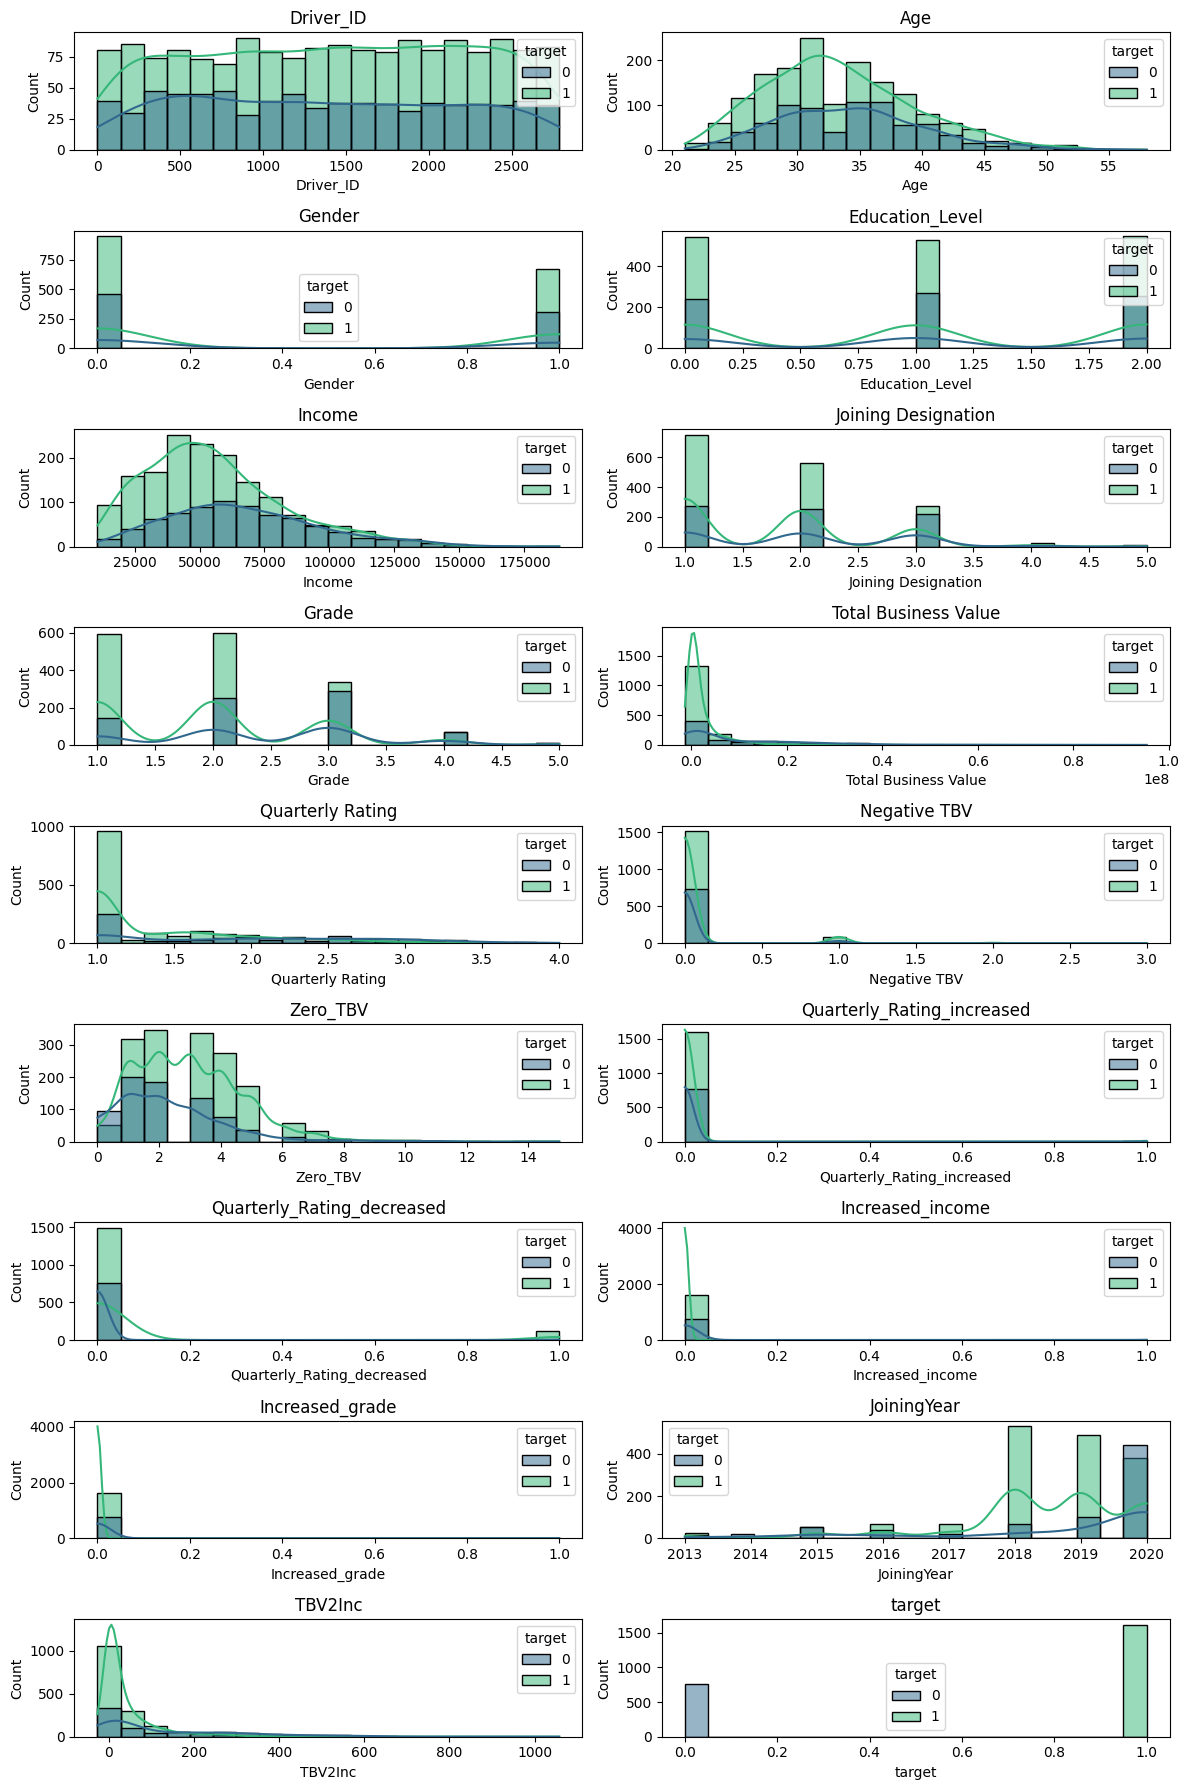

In [33]:
cols = df_grouped.select_dtypes(include=['int64', 'float64']).columns
# Calculate the number of rows and columns for subplots
num_cols = 2
num_rows = (len(cols) + 1) // 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 18))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot histograms
for index, col in enumerate(cols):
    sns.histplot(data=df_grouped, x=col, bins=20, ax=axes[index], kde=True, hue='target', palette='viridis')
    axes[index].set_title(col)

plt.tight_layout()
plt.show()

<Axes: xlabel='City', ylabel='count'>

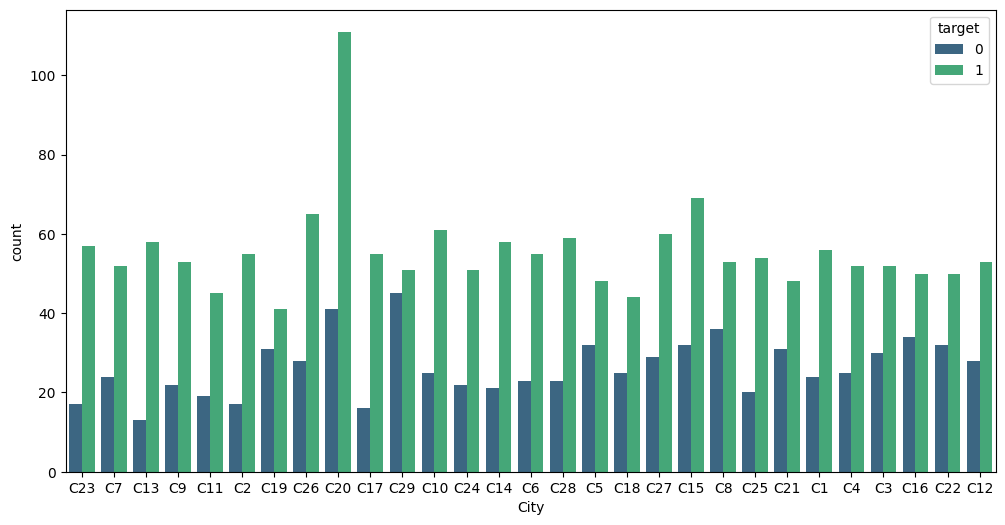

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_grouped, x='City', hue='target', palette='viridis')

## Bivariate Analysis

<Axes: xlabel='Grade', ylabel='Income'>

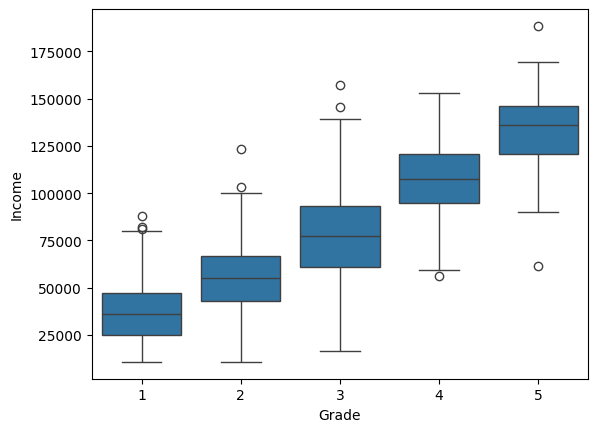

In [35]:
sns.boxplot(data=df_grouped, x='Grade', y='Income')

<Axes: xlabel='target', ylabel='Income'>

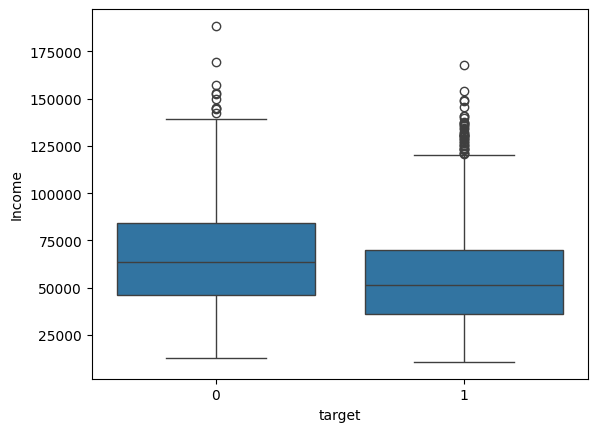

In [36]:
sns.boxplot(data=df_grouped, x='target', y='Income')

<Axes: xlabel='target', ylabel='Grade'>

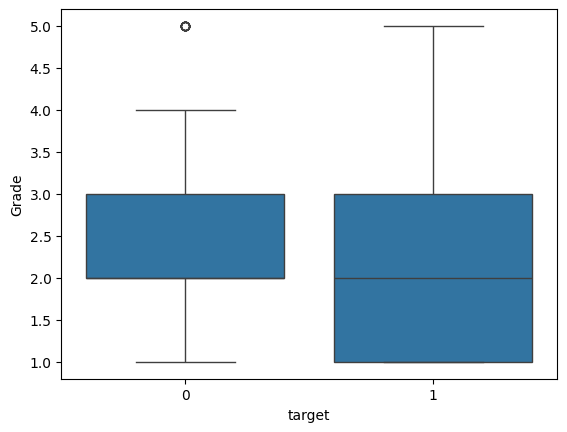

In [37]:
sns.boxplot(data=df_grouped, x='target', y='Grade')

<Axes: xlabel='target', ylabel='Total Business Value'>

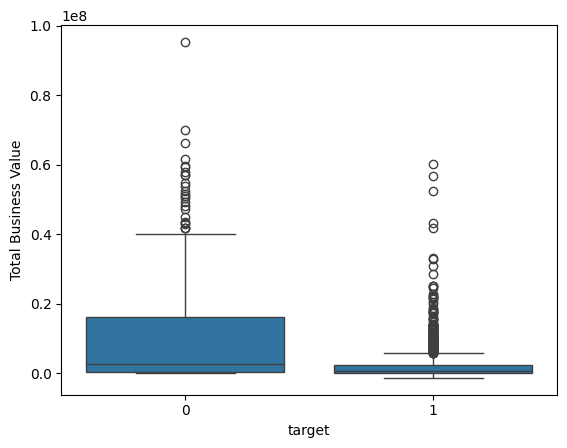

In [38]:
sns.boxplot(data=df_grouped, x='target', y='Total Business Value')

<Axes: xlabel='City', ylabel='QR_round'>

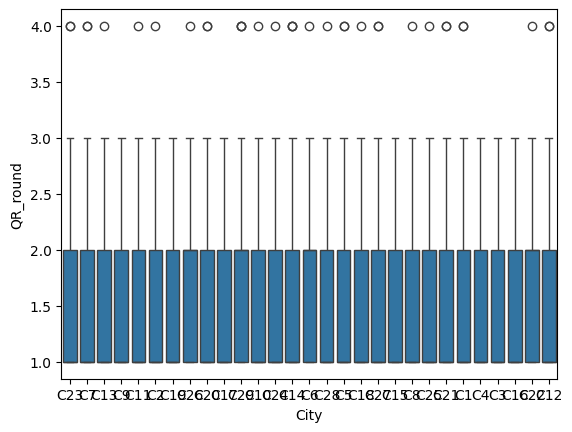

In [39]:
df_grouped['QR_round'] = round(df_grouped['Quarterly Rating'],0)
sns.boxplot(data=df_grouped, x='City', y='QR_round')

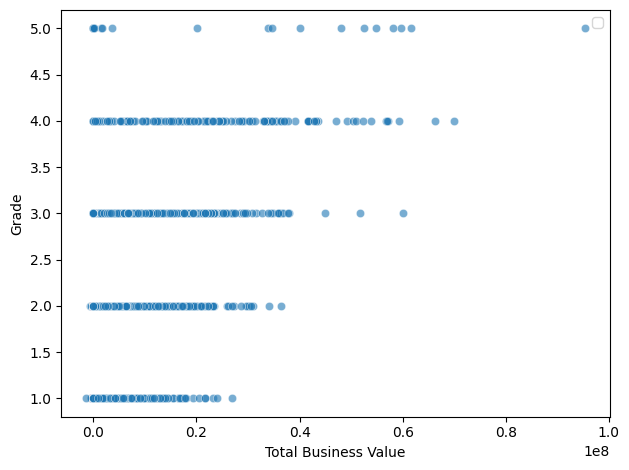

In [40]:
sns.scatterplot(data=df_grouped, x='Total Business Value', y='Grade', alpha=0.6)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.legend()
plt.show()

<Axes: xlabel='Quarterly_Rating_decreased', ylabel='Total Business Value'>

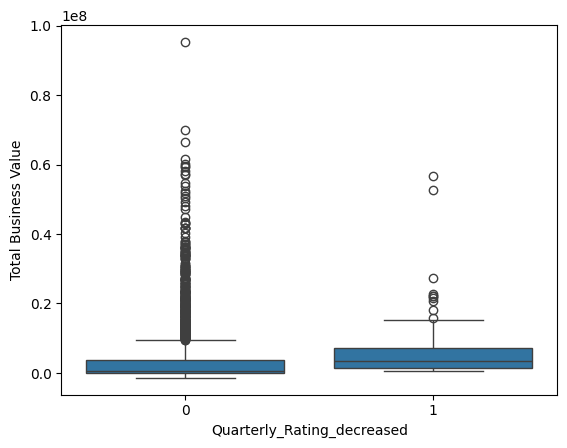

In [41]:
sns.boxplot(data=df_grouped, x='Quarterly_Rating_decreased', y='Total Business Value')

## Multivariate Analysis

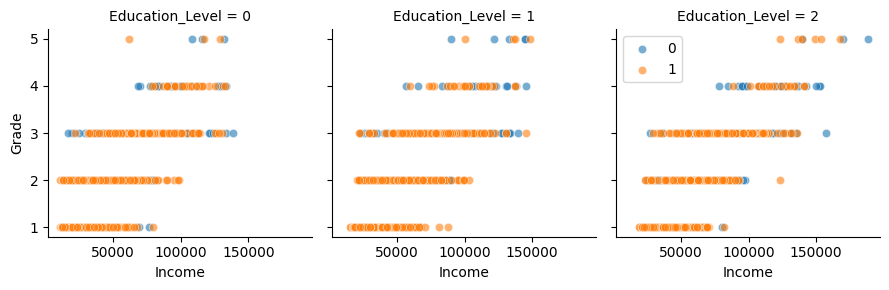

In [42]:
g = sns.FacetGrid(df_grouped, col='Education_Level', hue='target')

# Map a plot type to the FacetGrid
g.map(sns.scatterplot, 'Income', 'Grade', alpha=0.6)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.legend()
plt.show()

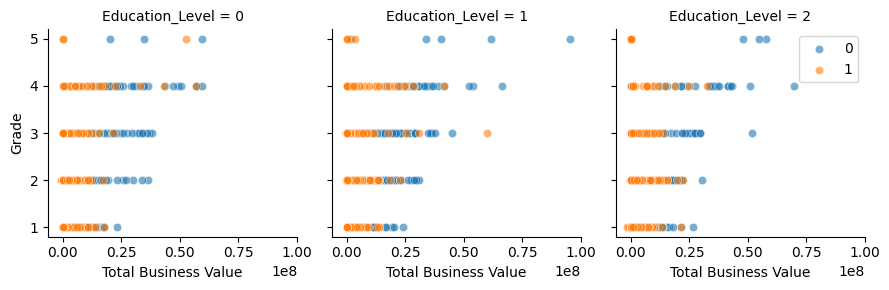

In [43]:
g = sns.FacetGrid(df_grouped, col='Education_Level', hue='target')

# Map a plot type to the FacetGrid
g.map(sns.scatterplot, 'Total Business Value', 'Grade', alpha=0.6)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


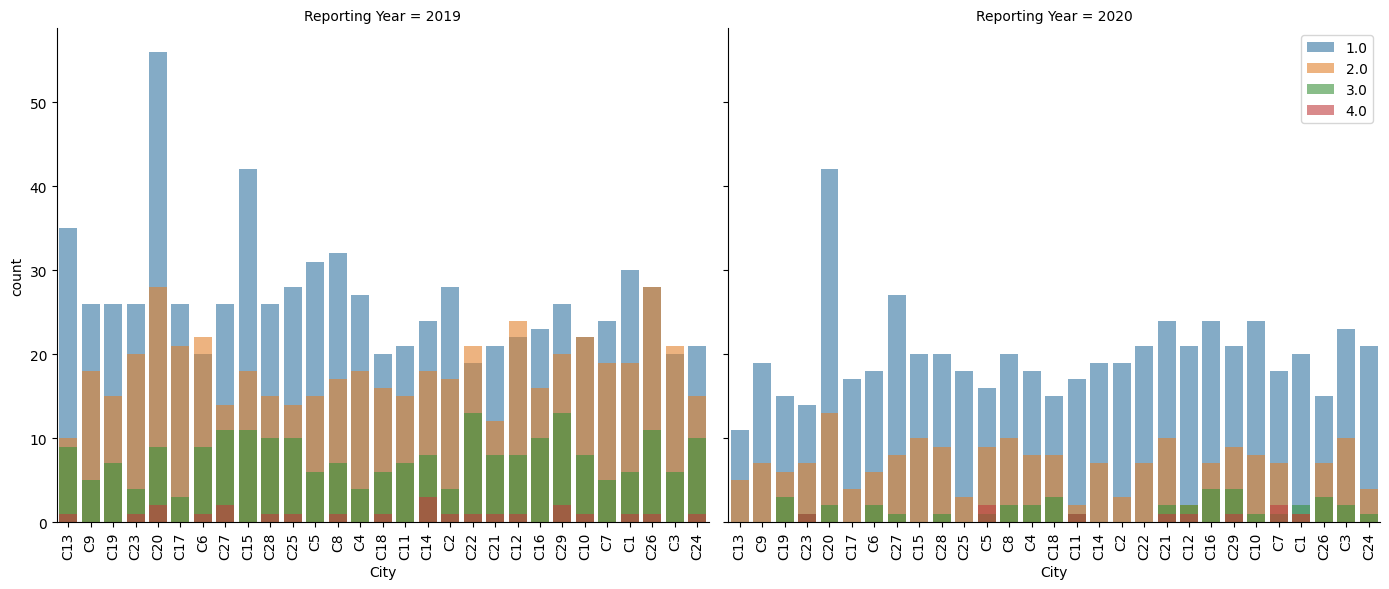

In [44]:
df_grouped['Reporting Year']=df_grouped['MMM-YY'].dt.year
df_grouped['QR_round'] = round(df_grouped['Quarterly Rating'],0)
g = sns.FacetGrid(df_grouped, col='Reporting Year', hue='QR_round')

# Map a plot type to the FacetGrid
g.map(sns.countplot, 'City', alpha=0.6)

g.set_xticklabels(rotation=90)
g.fig.set_size_inches(14,6)
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


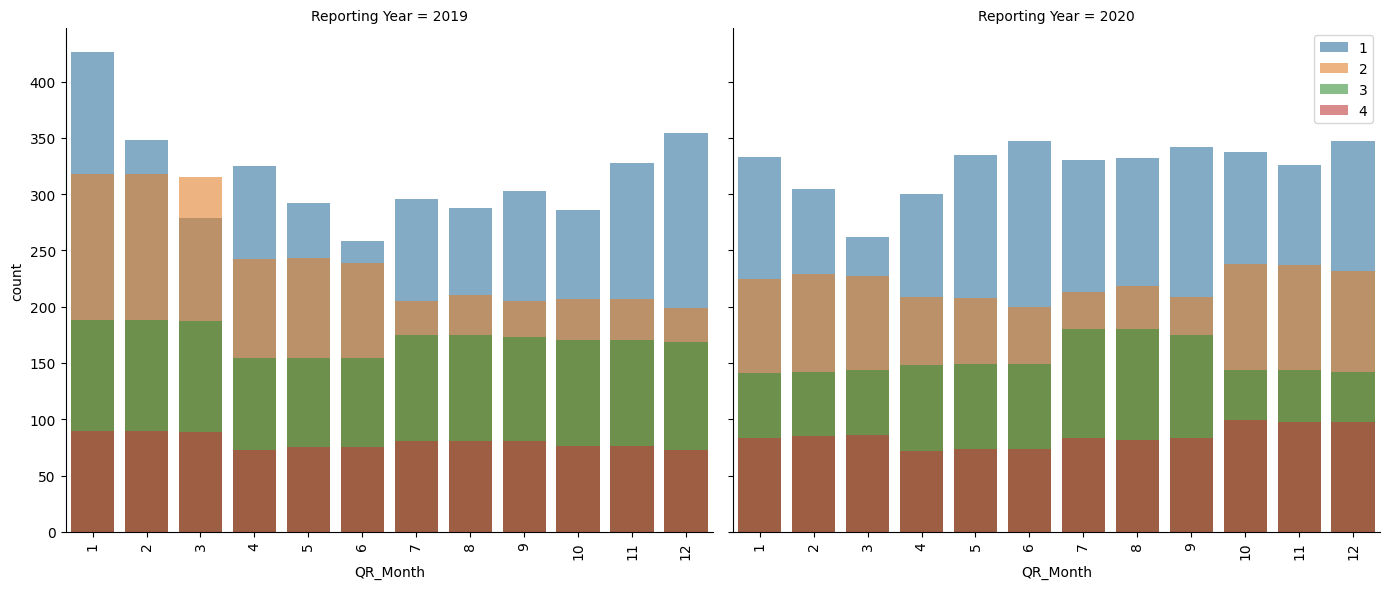

In [45]:
df['Reporting Year']=df['MMM-YY'].dt.year
df['QR_Month'] = df['MMM-YY'].dt.month
df['QR_round'] = round(df['Quarterly Rating'],0)
g = sns.FacetGrid(df, col='Reporting Year', hue='QR_round')

# Map a plot type to the FacetGrid
g.map(sns.countplot, 'QR_Month', alpha=0.6)

g.set_xticklabels(rotation=90)
g.fig.set_size_inches(14,6)
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.legend()
plt.show()

In [46]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Driver_ID                   2381 non-null   int64         
 1   MMM-YY                      2381 non-null   datetime64[ns]
 2   Age                         2381 non-null   float64       
 3   Gender                      2381 non-null   float64       
 4   City                        2381 non-null   object        
 5   Education_Level             2381 non-null   int64         
 6   Income                      2381 non-null   float64       
 7   Dateofjoining               2381 non-null   datetime64[ns]
 8   LastWorkingDate             1616 non-null   datetime64[ns]
 9   Joining Designation         2381 non-null   int64         
 10  Grade                       2381 non-null   int64         
 11  Total Business Value        2381 non-null   int64       

<ipython-input-47-42d0c26a1c1a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_grouped.corr()


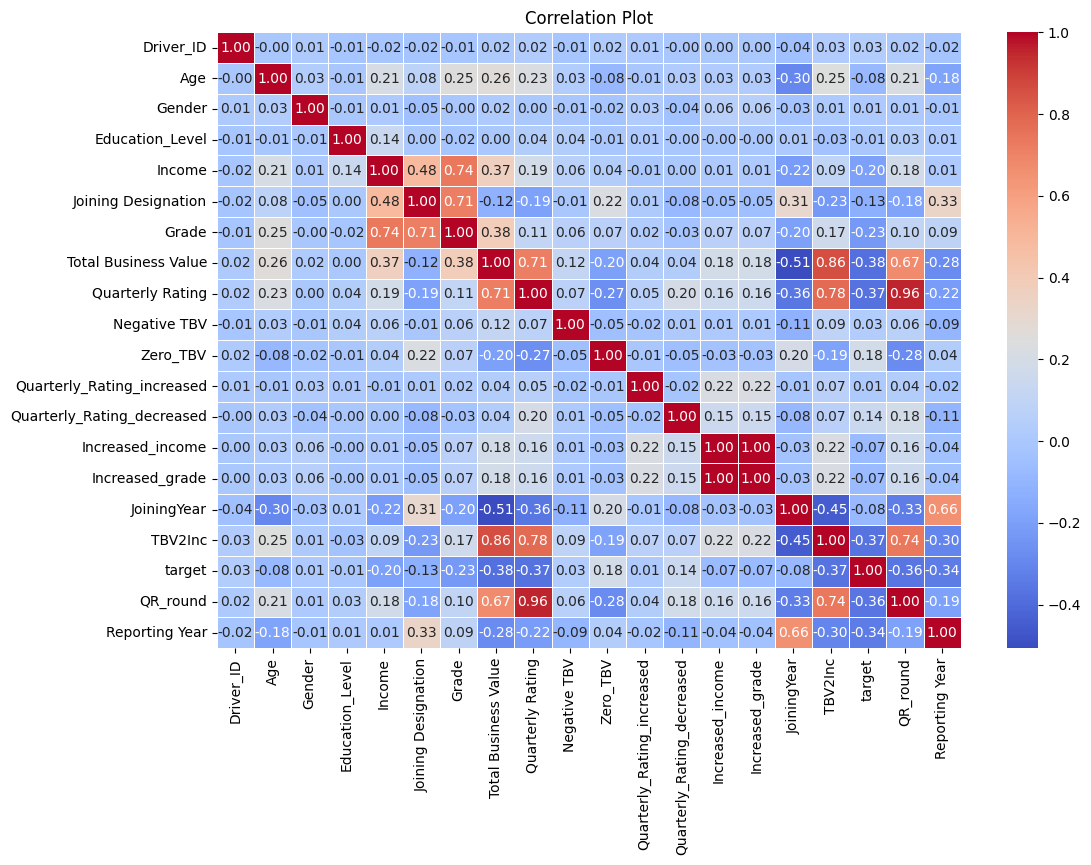

In [47]:
correlation_matrix = df_grouped.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

# Data Preprocessing

In [48]:
# City Encoding
city_mapping = {
    'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 5, 'C6': 6, 'C7': 7, 'C8': 8, 'C9': 9, 'C10': 10,
    'C11': 11, 'C12': 12, 'C13': 13, 'C14': 14, 'C15': 15, 'C16': 16, 'C17': 17, 'C18': 18, 'C19': 19, 'C20': 20,
    'C21': 21, 'C22': 22, 'C23': 23, 'C24': 24, 'C25': 25, 'C26': 26, 'C27': 27, 'C28': 28, 'C29': 29
}

# Map the cities using the dictionary
df_grouped['City'] = df_grouped['City'].map(city_mapping)

In [49]:
df_grouped['Ranking'] =df_grouped['Grade']+(df_grouped['Joining Designation'])

In [67]:
# Input and Target feature separation
X=df_grouped.drop(['target', 'MMM-YY', 'Dateofjoining', 'LastWorkingDate', 'Education_Level', 'Grade', 'Joining Designation', 'Reporting Year', 'QR_round', 'Driver_ID'], axis=1)
y=df_grouped['target']

In [68]:
# Record the column names
cols = X.columns

# Initialize StandardScaler
scale = StandardScaler()

# Standardize the training data
X_scaled = scale.fit_transform(X)

# Convert the standardized data back to a DataFrame with column names
X_scaled = pd.DataFrame(data=X_scaled, columns=cols)

In [69]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [70]:
y_train.value_counts()

1    1289
0     615
Name: target, dtype: int64

# Model Creation and ROC AUC Analysis

## Random Forest Classifier

In [143]:
rf_classifier = RandomForestClassifier(n_estimators=150, min_samples_leaf=3, criterion='entropy', n_jobs=-1, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the train and validation set
pred_train = rf_classifier.predict(X_train)
pred_test = rf_classifier.predict(X_test)

print(f'Train Accuracy: {accuracy_score(pred_train, y_train)}')
print(f'Validation Accuracy: {accuracy_score(pred_test, y_test)}')

Train Accuracy: 0.9495798319327731
Validation Accuracy: 0.8574423480083857


### Feature Importance

In [144]:
# Calculate Feature Importance
for score, name in zip(rf_classifier.feature_importances_, X_train.columns):
  print(round(score,2),name)

0.05 Age
0.01 Gender
0.06 City
0.08 Income
0.16 Total Business Value
0.1 Quarterly Rating
0.0 Negative TBV
0.09 Zero_TBV
0.0 Quarterly_Rating_increased
0.02 Quarterly_Rating_decreased
0.0 Increased_income
0.0 Increased_grade
0.25 JoiningYear
0.13 TBV2Inc
0.04 Ranking


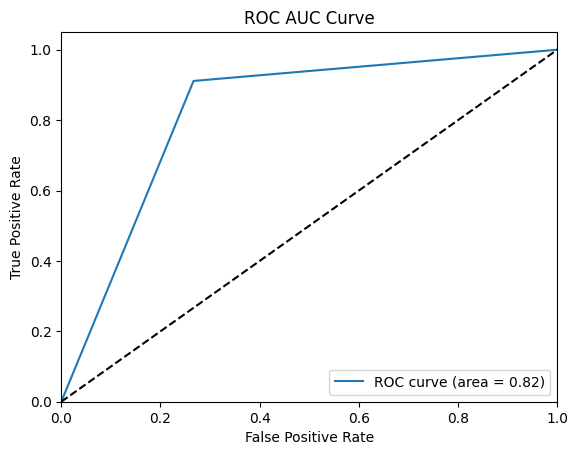

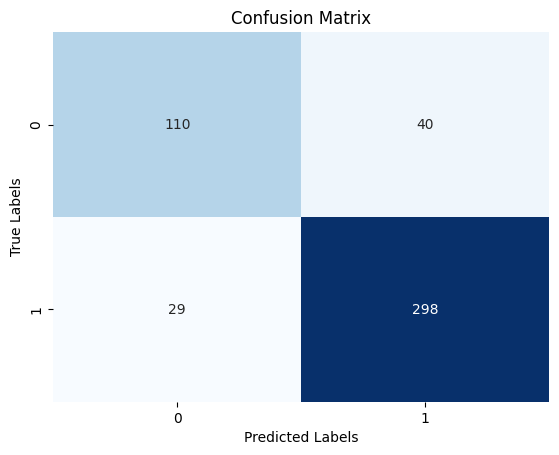


 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       150
           1       0.88      0.91      0.90       327

    accuracy                           0.86       477
   macro avg       0.84      0.82      0.83       477
weighted avg       0.85      0.86      0.85       477



In [86]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, pred_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, pred_test)
print()
# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report and confusion matrix
print("\n Classification Report:")
print(classification_report(y_test, pred_test))

## LightGMB

In [74]:
# Define the LightGBM classifier with hyperparameters
lgb_classifier = lgb.LGBMClassifier(n_estimators=150, boosting_type='gbdt', learning_rate=0.02, random_state=42)

# Train the classifier
lgb_classifier.fit(X_train, y_train)

# Predict on the train and validation set
pred_train = lgb_classifier.predict(X_train)
pred_test = lgb_classifier.predict(X_test)

# Evaluate the model
print(f'Train Accuracy: {accuracy_score(pred_train, y_train)}')
print(f'Validation Accuracy: {accuracy_score(pred_test, y_test)}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1289, number of negative: 615
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 1904, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.676996 -> initscore=0.740000
[LightGBM] [Info] Start training from score 0.740000
Train Accuracy: 0.9343487394957983
Validation Accuracy: 0.8658280922431866


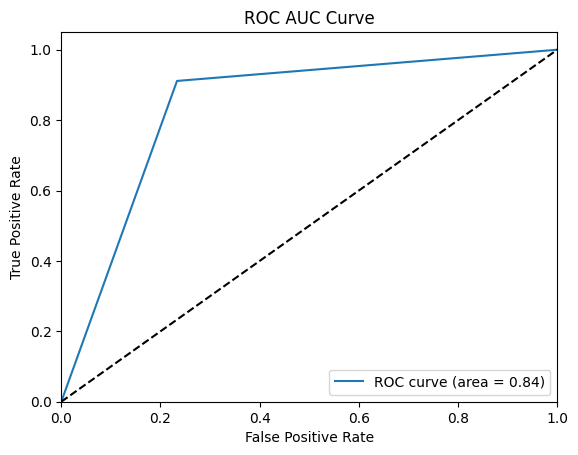

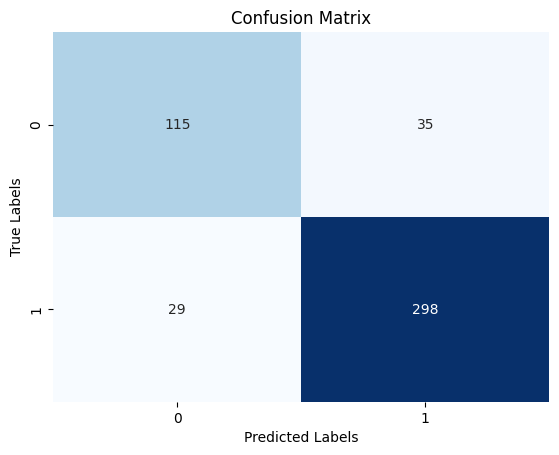


 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       150
           1       0.89      0.91      0.90       327

    accuracy                           0.87       477
   macro avg       0.85      0.84      0.84       477
weighted avg       0.86      0.87      0.87       477



In [75]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, pred_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, pred_test)
print()
# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report and confusion matrix
print("\n Classification Report:")
print(classification_report(y_test, pred_test))

## XGBoost

In [76]:
# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=50, learning_rate=0.095, random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predict on the train and validation set
pred_train = xgb_classifier.predict(X_train)
pred_test = xgb_classifier.predict(X_test)

# Evaluate the model
print(f'Train Accuracy: {accuracy_score(pred_train, y_train)}')
print(f'Validation Accuracy: {accuracy_score(pred_test, y_test)}')

Train Accuracy: 0.9332983193277311
Validation Accuracy: 0.8616352201257862


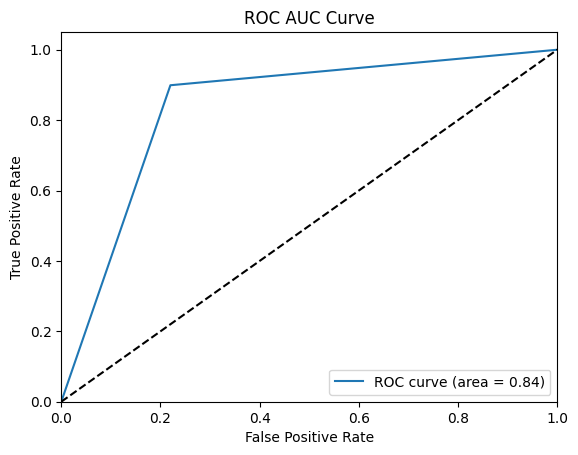

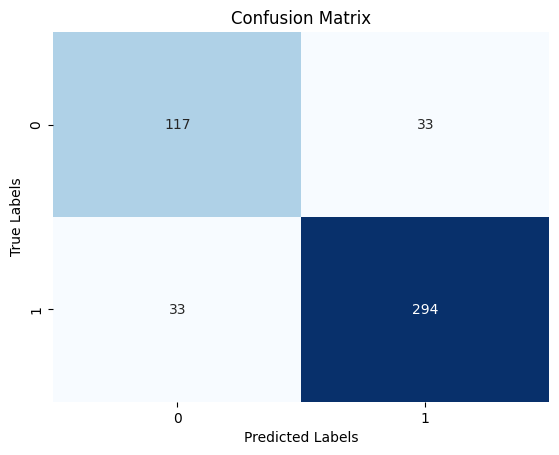


 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       150
           1       0.90      0.90      0.90       327

    accuracy                           0.86       477
   macro avg       0.84      0.84      0.84       477
weighted avg       0.86      0.86      0.86       477



In [77]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, pred_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, pred_test)
print()
# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report and confusion matrix
print("\n Classification Report:")
print(classification_report(y_test, pred_test))

## Gradient Boosting

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.131, random_state=42)

# Fit the classifier to the training data
gb_clf.fit(X_train, y_train)

# Predict the labels for the test set
pred_test = gb_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, pred_test)
print("Accuracy:", accuracy)


Accuracy: 0.8721174004192872


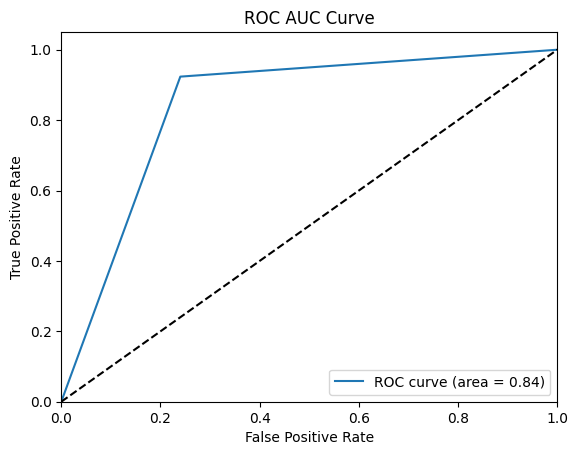

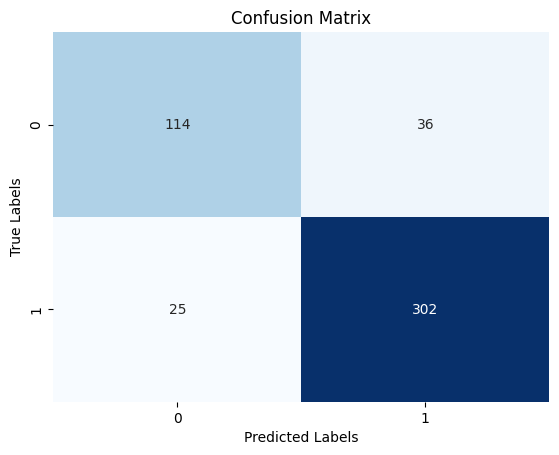


 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       150
           1       0.89      0.92      0.91       327

    accuracy                           0.87       477
   macro avg       0.86      0.84      0.85       477
weighted avg       0.87      0.87      0.87       477



In [79]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, pred_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, pred_test)
print()
# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report and confusion matrix
print("\n Classification Report:")
print(classification_report(y_test, pred_test))

## Adaptive Boosting

In [80]:
from sklearn.ensemble import AdaBoostClassifier

# Instantiate the AdaBoost classifier
adaboost_clf = AdaBoostClassifier(n_estimators=80, learning_rate=0.84, random_state=42)  # You can specify the number of estimators (weak learners)

# Fit the classifier to the training data
adaboost_clf.fit(X_train, y_train)

# Predict the labels for the test set
pred_test = adaboost_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, pred_test)
print("Accuracy:", accuracy)


Accuracy: 0.8805031446540881


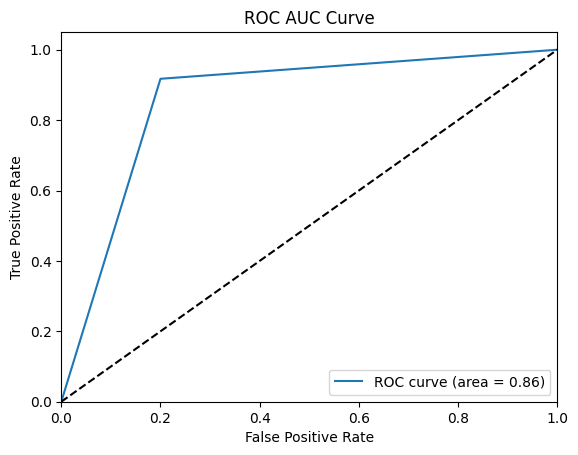

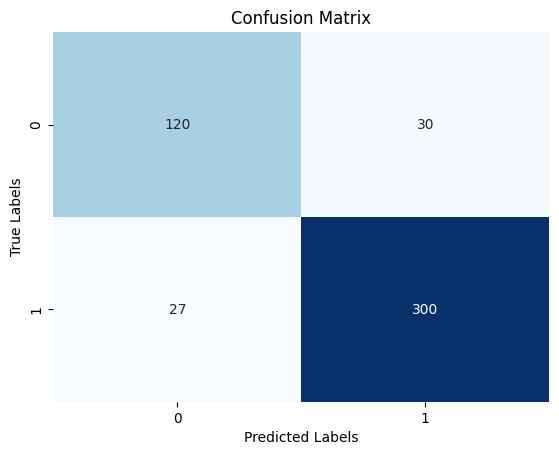


 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       150
           1       0.91      0.92      0.91       327

    accuracy                           0.88       477
   macro avg       0.86      0.86      0.86       477
weighted avg       0.88      0.88      0.88       477



In [81]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, pred_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, pred_test)
print()
# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report and confusion matrix
print("\n Classification Report:")
print(classification_report(y_test, pred_test))

## Voting Classifier

In [82]:
# Define the Voting Classifier with the base classifiers
voting_classifier = VotingClassifier(
    estimators=[
        # ('rf', rf_classifier),
        ('lgb', lgb_classifier),
        ('ada', adaboost_clf),
        ('gbdt', gb_clf),
        # ('xgb', xgb_classifier)
    ],
    voting='hard',
    n_jobs=-1,
    # weights=[1,2,2,1,1]
)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Predict on the test set
pred_train = voting_classifier.predict(X_train)
pred_test = voting_classifier.predict(X_test)

# Evaluate the model
print(f'Train Accuracy: {accuracy_score(pred_train, y_train)}')
print(f'Validation Accuracy: {accuracy_score(pred_test, y_test)}')

Train Accuracy: 0.9044117647058824
Validation Accuracy: 0.8805031446540881


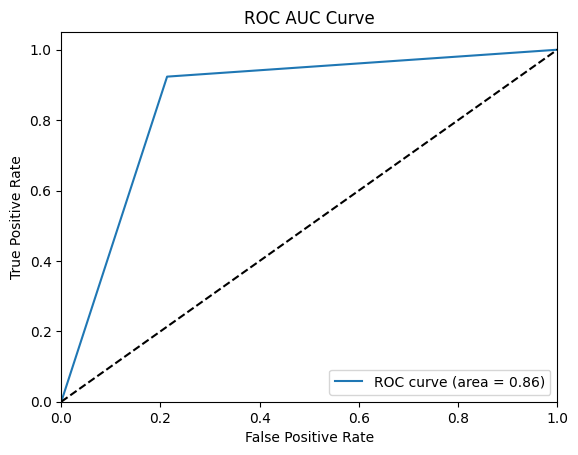

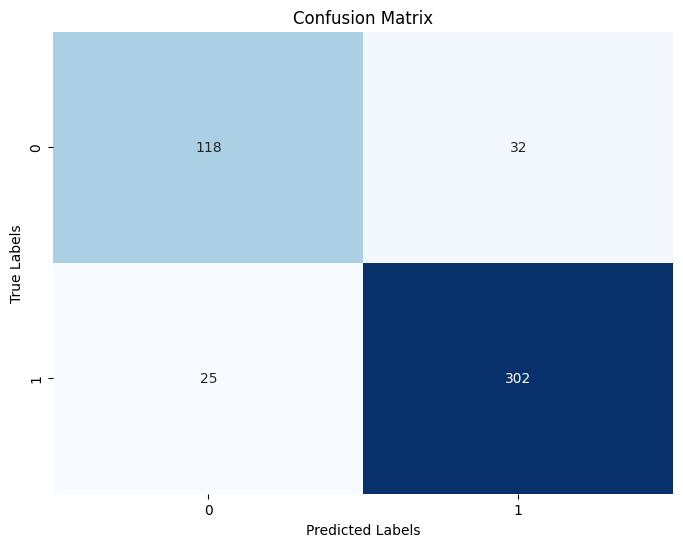


 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       150
           1       0.90      0.92      0.91       327

    accuracy                           0.88       477
   macro avg       0.86      0.86      0.86       477
weighted avg       0.88      0.88      0.88       477



In [83]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, pred_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, pred_test)
print()
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report and confusion matrix
print("\n Classification Report:")
print(classification_report(y_test, pred_test))

# Model Comparison

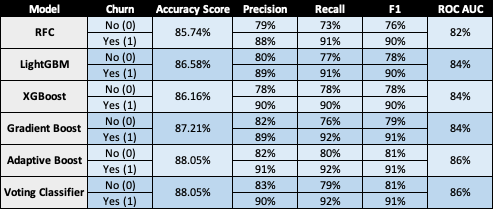

**Model Performance:**

Each model (Random Forest Classifier, LightGBM, XGBoost, Gradient Boost, Adaptive Boost, and Voting Classifier) achieves relatively high accuracy scores ranging from 85.74% to 88.05% for predicting churn.

**Churn Prediction Metrics:**

* Precision: The precision measures the proportion of correctly predicted churn cases among all predicted churn cases. It ranges from 78% to 91% for predicting churn, indicating the models' ability to avoid false positives.
* Recall: The recall measures the proportion of correctly predicted churn cases among all actual churn cases. It ranges from 73% to 92%, indicating the models' ability to identify actual churn cases.
* F1 Score: The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics. It ranges from 77% to 91%.
* ROC AUC: The ROC AUC (Area Under the Receiver Operating Characteristic Curve) measures the models' ability to distinguish between churn and non-churn instances. It ranges from 82% to 86%, indicating good performance in classifying instances.

**Comparison Across Models:**

Adaptive Boost and Voting Classifier consistently achieve the highest accuracy score, precision, recall, F1 score, and ROC AUC among the models considered.
Random Forest Classifier, LightGBM, XGBoost, and Gradient Boost also perform well but have slightly lower performance metrics compared to Adaptive Boost and Voting Classifier.


**Model Comparison:**

* Adaptive Boost and the Voting Classifier stands out as the best-performing model overall, with consistently high scores across all metrics for both predicting churn and non-churn.

# Insights and Recommendation

## Performance Metrics

* Based on the performance metrics, the OLA may consider using Adaptive Boost as the primary model for churn prediction, as it achieves the highest scores across most evaluation metrics.
* Additionally, RandomForestClassifier, Gradient Boost, and the Voting Classifier are suitable alternatives, offering competitive performance for churn prediction.

## Feature Importance

**JoiningYear (0.25):** This feature has the highest importance score, indicating that the year in which the drivers joined the company is the most significant predictor of the target variable.

**Total Business Value (0.16):** Total business value follows closely in importance, suggesting that the overall revenue generated by the drivers is a strong predictor of the target variable.

**TBV2Inc (0.13):** TBV2Inc, which lis the ratio of total business value to income, has a notable importance score, indicating it's influence on the target variable.

**Quarterly Rating (0.1):** Quarterly rating is also an important predictor, suggesting that the periodic performance ratings of the drivers may be indicative of their behavior or likelihood to churn.

**Zero_TBV (0.09):** Zero_TBV, indicating the number of instances where total business value is zero for a driver, has a relatively high importance score, implying that this condition is a significant predictor of the target variable.

**City (0.06):** The driver's city of residence has moderate importance, indicating that geographical location may influence driver behavior and the likelihood of churn.

**Age (0.05):** Age follows with moderate importance, suggesting that the age demographic of drivers also plays a role in predicting the target variable.

**Ranking (0.04):** Ranking has a lower importance score compared to other features but still contributes to the model's predictive power, suggesting that drivers rankings have some influence on churn behavior.

**Quarterly_Rating_decreased (0.02):** This feature represents instances where the quarterly rating has decreased, indicating a slight influence on the target variable.

**Gender (0.01):** Gender has the lowest importance score among the features considered, implying that it has minimal impact on predicting the target variable.

**Negative TBV, Increased_income, Increased_grade, Quarterly_Rating_increased:** These features have zero importance, indicating that they do not significantly contribute to predicting the target variable based on the current model.


**Recommendation:**

Based on the feature importance analysis, OLA may prioritize strategies and interventions aimed at improving total business value, retaining drivers who joined in earlier years, and managing quarterly ratings effectively.

# Questionnaire

**1. What percentage of drivers have received a quarterly rating of 5?**
  * None of the drivers in the given data set have recieved a [Quarterly rating](https://colab.research.google.com/drive/103POprjrRLZxaiYYeLy1QZj3i0ycIuSn#scrollTo=EEm33-ySiHgX&line=4&uniqifier=1) of 5.0.
  

**2. Comment on the correlation between Age and Quarterly Rating.**
  * ***Weak Positive Correlation:*** The [correlation](https://colab.research.google.com/drive/103POprjrRLZxaiYYeLy1QZj3i0ycIuSn#scrollTo=ayBtM2LVphzP&line=3&uniqifier=1) coefficient of 0.23 indicates a weak positive linear relationship between Age and Quarterly Rating. As the value is positive, it suggests that as Age increases, there tends to be a slight increase in Quarterly Rating on average.

**3. Name the city which showed the most improvement in Quarterly Rating over the past year.**
  * [C3 and C21](https://colab.research.google.com/drive/103POprjrRLZxaiYYeLy1QZj3i0ycIuSn#scrollTo=QhRdz8NBG5gR&line=1&uniqifier=1) showed the most improvement in Quarterly Rating over the past year.

**4. Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value. (T/F)**
  * [False](https://colab.research.google.com/drive/103POprjrRLZxaiYYeLy1QZj3i0ycIuSn#scrollTo=hBo5H8ZLwTRC&line=8&uniqifier=1). A higher total business value is more likely to be associated with drivers having a higher grade but not vice versa. It can be visualized from the graph density of the drivers for all grades is more towards the low total business value however the maximum total business value increases with the increase in grade.

**5. If a driver's Quarterly Rating drops significantly, how does it impact their Total Business Value in the subsequent period?**
  * If a driver's Quarterly Rating drops significantly, the [Total Business Value](https://colab.research.google.com/drive/103POprjrRLZxaiYYeLy1QZj3i0ycIuSn#scrollTo=WUyQeFa4DHTK&line=1&uniqifier=1) also drops significantly for the driver.

**6. From Ola's perspective, which metric should be the primary focus for driver retention?**
* **ROC AUC**
* **Precision**
* **Recall**
* **F1 Score**

* In scenarios where the consequences of false negatives (predicting a driver will not churn but they actually do) outweigh those of false positives (predicting a driver will churn but they do not), maximizing Recall may indeed be more appropriate.
* Maximizing Recall would prioritize identifying all potentially churn-prone drivers, even if it means some false positives occur. This approach aims to minimize the risk of missing drivers who are genuinely at risk of leaving the platform.

**7. How does the gap in precision and recall affect Ola's relationship with its drivers and customers?**
* The gap between precision and recall can have significant impact on Ola's relationship with its drivers and customers:

  **Driver Relationship:**

  **High Precision, Low Recall:** If Ola prioritizes precision over recall, it means that the company is focusing on accurately identifying drivers who meet certain criteria (e.g., high-performance drivers, drivers with positive customer ratings). This can lead to better driver satisfaction as it ensures that drivers who receive incentives, rewards, or recognition truly deserve it based on their performance. However, it may also result in missing out on some deserving drivers who might be overlooked due to the stringent criteria, potentially leading to dissatisfaction among those drivers.

  **Low Precision, High Recall:** Conversely, if Ola prioritizes recall over precision, it means that the company is casting a wider net to include a larger number of drivers who meet certain criteria. While this approach may ensure that deserving drivers are not overlooked, it may also lead to rewarding drivers who do not truly deserve it, potentially causing dissatisfaction among drivers who feel that rewards are being distributed unfairly.

  **Customer Relationship:**

  **High Precision, Low Recall:** A high precision means that Ola's algorithms accurately identify and recommend drivers who provide exceptional service, leading to higher customer satisfaction. Customers are more likely to receive a reliable and high-quality service when matched with drivers who have a proven track record of performance. However, if the recall is low, it means that Ola may miss out on recommending some high-quality drivers, leading to potential dissatisfaction among customers who receive subpar service from drivers who were not identified by the algorithm.

  **Low Precision, High Recall:** A focus on high recall ensures that Ola's algorithms cast a wider net to include a larger pool of drivers, increasing the chances of matching customers with available drivers. While this approach may lead to more reliable service availability, it also increases the likelihood of recommending drivers who may not provide the best service quality. This could result in customer dissatisfaction if they have negative experiences with drivers who were recommended by the algorithm based on high recall but do not meet the expected service standards.

  In summary, the gap between precision and recall can influence Ola's relationship with its drivers and customers by impacting the fairness of rewards and incentives for drivers, as well as the quality and reliability of service for customers. Ola must strike the right balance between precision and recall to ensure a positive experience for both drivers and customers.

**8. Besides the obvious features like "Number of Rides", which lesser-discussed features might have a strong impact on a driver's Quarterly Rating?**
The below features might have a strong impact on a driver's Quarterly Rating
* Response Time
* Route Efficiency
* Vehicle Cleanliness and Maintenance
* Communication Skills
* Safety and Driving Behavior
* Personalization and Customer Service

**9. Will the driver's performance be affected by the City they operate in? (Yes/No)**
* [No](https://colab.research.google.com/drive/103POprjrRLZxaiYYeLy1QZj3i0ycIuSn#scrollTo=pWn0vllMWFXP&line=2&uniqifier=1). The driver's performance is not affected by the City they operate in as it can be inferred from the box plot that all the cities share a similar range of Quarterly Rating among it's drivers.

**10. Analyze any seasonality in the driver's ratings. Do certain times of the year correspond to higher or lower ratings, and why might that be?**
* Not much [seasonality](https://colab.research.google.com/drive/103POprjrRLZxaiYYeLy1QZj3i0ycIuSn#scrollTo=_HxCudhdddiH&line=10&uniqifier=1) is seen in the driver's ratings however in the months of 'July,' 'August' and 'September' for both the years 2019 and 2020 there is a decline than usual in the 2.0 Quarterly Rating of the driver's.
